# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: Clustering and dimension-reduction
### VIDEO: dbscan
#### TEACHER: Mike X Cohen, sincxpress.com

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

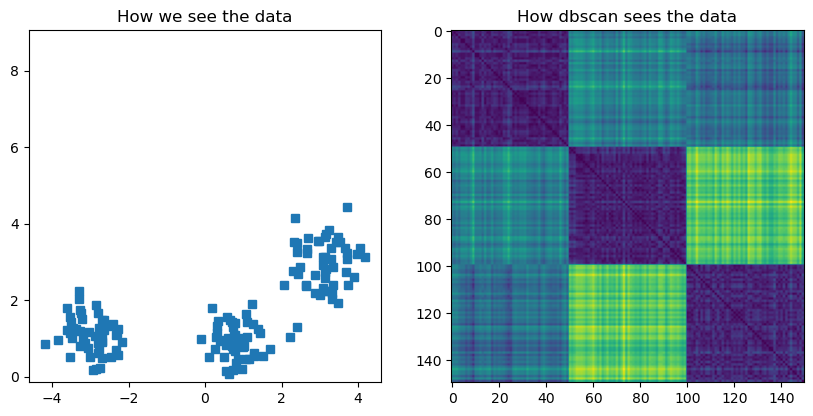

In [4]:
## Create data

nPerClust = 50 # 50 data points per cluster

# blur around centroid (std units)
blur = .5

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
# A[0]+np.random.randn(n) is generating random number n times and element wise creating an entry with that rand num added to A[0] (so you wind up with an array of nPerClust length)
# it is generating n X points randomly distanced from the A centroid X coord, and n Y points randomly distanced from the centroid
  # example: 1 + np.array([1,1,1]) => [2,2,2] -- think of it as an operation (1 +) run on each element of the array
a = [ A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur] # [[...x], [...y]]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# adjust the data so the 
data = np.transpose( np.concatenate((a,b,c),axis=1) ) # x and y coords for points - X is first col and Y second col
# this puts all the X coords for a b and c in one col, and all the y coords for a b and c in another col for easy use with plotting.


# show the data
fig,ax = plt.subplots(1,2,figsize=(10,10)) # 1 row of 2 cols with cells of size 10x10

ax[0].plot(data[:,0],data[:,1],'s')
ax[0].set_title('How we see the data')
ax[0].axis('square')

### all to all distance matrix (plot on the right)
D = np.zeros((len(data),len(data)))
# loop over all the data points twice
for i in range(len(D)):
    for j in range(len(D)):
        # Standard Euclidian distance (straight line distance on a plane) - square root of (x2 - x1)^2 + (y2-y1)^2
        currX, currY = data[i,0], data[i,1] # the current anchor coord in the row
        otherX, otherY = data[j,0], data[j,1] # other points as we iterate down the col to get distance from anchor
        D[i,j] = np.sqrt( (currX - otherX)**2 + (currY - otherY)**2 )

# D is a 5x5 matrix of the distances from one point to all other points
ax[1].imshow(D) # maps the distances passed in to a colormap - darker means the point on x axis is closer to another point on y axis (both axes represent a point in the data)
ax[1].set_title('How dbscan sees the data')
plt.show()

# from the plot we see 3 clear clusters

In [5]:
# trying to understand concatenate with axis 1...

# a = np.array([1,2])
# b = np.array([3,4])
# c = np.array([5,6])

# A = [a[0]+np.array([1,1]), a[1]+np.array([1,1])]
# B = [b[0]+np.array([1,1]), b[1]+np.array([1,1])]
# C = [c[0]+np.array([1,1]), c[1]+np.array([1,1])]

# print(np.concatenate((A,B), axis=1))
# print(np.concatenate((A,B), axis=0))

# xs = ['X','X','X']
# ys = ['Y','Y','Y']

# print(np.concatenate((xs,ys), axis=0))
# # print(np.concatenate((xs,ys), axis=1)) # does not work because you need columns (which requires a 2d array with rows and columns)

# # with columns - a 2d array
# xs = [['X1','X1','X1'],['Y1','Y1','Y1']]
# ys = [['X2','X2','X2'],['Y2','Y2','Y2']]
# print(np.concatenate((xs,ys),axis=0))
# concated = np.concatenate((xs,ys),axis=1) # the columns are arr[i][j], so xs[0], then concat ys[0], then xs[1] and ys[1]
# print(concated)

# transposed = np.transpose(concated)
# print(transposed)

[[ 0.79064876  0.92194829]
 [-2.97451761  1.08973147]
 [ 3.13372298  2.93241913]]


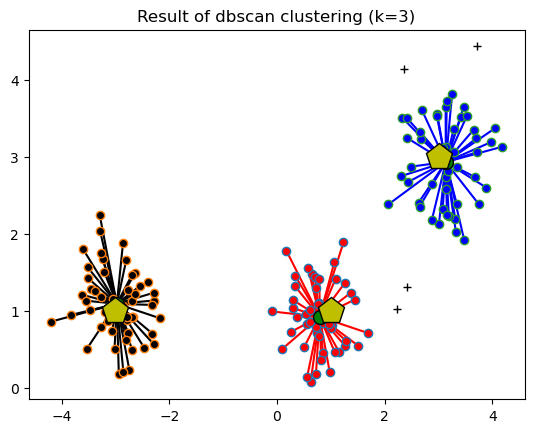

In [12]:
## dbscan

# build a model using the DBSCAN fn
# Epsilon(eps) is the step size in the algo for looking for points within that distance from each other
# min_samples is the minimum num of data points needed to be considered a cluster
clustmodel = DBSCAN(eps=.6,min_samples=6).fit(data)
groupidx = clustmodel.labels_ # [0,0,0,1,1,1,-1,2,2,2...] The index corresponds to the data point and the cluster is 0,1 or 2 (3 clusters). -1 means it was not assigned a cluster.

# get the number of clusters calculated from dbscan
nclust = max(groupidx)+1 # +1 since the labels are 0 based

# compute cluster centers
cents = np.zeros((nclust,2)) # initialize a 3x2 arr to store the 3 computed centroid x,y coords

for ci in range(nclust): # 3 clusters
    # x coord of centroid i
    cents[ci,0] = np.mean(data[groupidx==ci,0]) # the mean of all the x coords belonging to group ci (row is a data point whose index corresponds with the group number index pos in the labels, then col is 0)
    # y coord of centroid i
    cents[ci,1] = np.mean(data[groupidx==ci,1])
print(cents)

# draw lines from each data point to the centroids of each cluster

# red, black, blue, green, and magenta colors
lineColors = 'rkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgm' # 60 chars - repeated cycle of four colors
# not sure why these are repeated so much - maybe incase the labels are more than a few?

for i in range(len(data)):
    if groupidx[i]==-1: # -1 label means they were not assigned to a cluster - shown as a plus symbol on plot
        plt.plot(data[i,0],data[i,1],'k+')
    else:
        # plot a line that goes from a data point i to the computed centroid coord
        plt.plot([ data[i,0], cents[groupidx[i],0] ],[ data[i,1], cents[groupidx[i],1] ],lineColors[groupidx[i]])
        

# now draw the raw data in different colors
for i in range(nclust):
    plt.plot(data[groupidx==i,0],data[groupidx==i,1],'o',markerfacecolor=lineColors[i])

# and now plot the computed centroid locations
plt.plot(cents[:,0],cents[:,1],'ko',markerfacecolor='g',markersize=10) # shown as green circles on plot
plt.title('Result of dbscan clustering (k=' + str(nclust) + ')')

# finally, the actual centers (not computed from dbscan) shown as yellow pentagons (they might overlap the computed centroids in green..)
plt.plot(A[0],A[1],'kp',markersize=20,markerfacecolor='y')
plt.plot(B[0],B[1],'kp',markersize=20,markerfacecolor='y')
plt.plot(C[0],C[1],'kp',markersize=20,markerfacecolor='y')

plt.show()

C:\Users\New AMD 5600G Build\AppData\Local\Temp\ipykernel_12264\925768402.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  aspect=20,origin='lower',cmap=cm.get_cmap('jet',10))
C:\Users\New AMD 5600G Build\AppData\Local\Temp\ipykernel_12264\925768402.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  aspect=20,origin='lower',cmap=cm.get_cmap('jet',10))


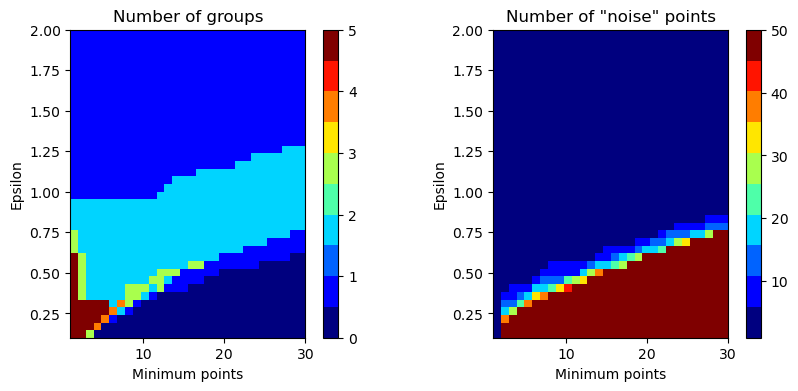

In [19]:
## testing the parameter space

# You can test a range of parameters for epsilon (eps) and step size (min_samples) to see which ones are more correct

# parameter ranges: epsilons from .1 to 2 and step sizes from 1 to 30
epsilons = np.linspace(.1,2,40) # vector of epsilons from .1 to 2 i.e. [.1, ..., 2]
minpoints = np.arange(1,31) # [1,2,3,...,30]


# initialize results matrix
results = np.zeros((len(epsilons),len(minpoints),2))

# in the following approach we hold the data constant and vary the params (bayesian approach)

# loop over the epsilon values to try them all out
for ei in range(len(epsilons)):
    # for each epsilon try out all of the step sizes/min sample params
    for di in range(len(minpoints)):
        clustmodel = DBSCAN(eps=epsilons[ei],min_samples=minpoints[di]).fit(data)
        groupidx = clustmodel.labels_

        results[ei,di,0] = max(groupidx) # this is the number of computed clusters (zero based)
        results[ei,di,1] = sum(groupidx==-1) # the total num of points that were computed as noise


# since we know the true number of clusters is 3, we want to look for results that match this
# NOTE: in real data you don't know what the real answer is, so you use the graphs to guesstimate what seems like the right general area/range of params

# for colormap discretization
    # this will show a color region encompassing params that give you the correct result (3 clusters)
from pylab import cm

fig,ax = plt.subplots(1,2,figsize=(10,4))
aa = ax[0].imshow(results[:,:,0],vmin=0,vmax=5,
                  extent=[minpoints[0],minpoints[-1],epsilons[0],epsilons[-1]], # this sets the y axis range from 0 to 2
                  aspect=20,origin='lower',cmap=cm.get_cmap('jet',10))
ax[0].set_xlabel('Minimum points')
ax[0].set_ylabel('Epsilon')
ax[0].set_title('Number of groups')
plt.colorbar(aa,ax=ax[0])

aa = ax[1].imshow(results[:,:,1],vmin=1,vmax=len(data)/3,
                  extent=[minpoints[0],minpoints[-1],epsilons[0],epsilons[-1]],
                  aspect=20,origin='lower',cmap=cm.get_cmap('jet',10))
ax[1].set_xlabel('Minimum points')
ax[1].set_ylabel('Epsilon')
ax[1].set_title('Number of "noise" points')
plt.colorbar(aa,ax=ax[1])

plt.show()

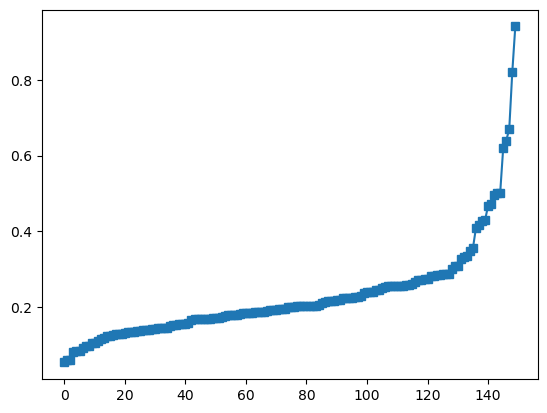

In [20]:
## determining the appropriate parameters

# NOTE: The thesis I linked in the video is no longer available. 
#    There are several methods to determine an appropriate epsilon
#    parameter, depending on the nature of the data and level of
#    sophistication required. I hope the references below are helpful; you
#    can also google around to find more tips for picking parameters.
# 
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
# https://core.ac.uk/download/pdf/219373759.pdf
# https://www.biorxiv.org/content/10.1101/2020.07.09.195784v2.full.pdf
 
# a suggested algorithm is to look at distances between points and look for small distances that start to diverge into large distances
D = np.zeros(len(data))

for i in range(len(data)):
    # compute distance
    d = np.sqrt( (data[i,0]-data[:,0])**2 + (data[i,1]-data[:,1])**2 )
    
    # distance to 3rd closest point (not the next closest immediate point! this is a detail of the algo)
    d = np.sort(d)
    D[i] = d[2]

# the idea is to pick an epsilon (on the y axis) where the graph starts to curve drastically up (as opposed to increasing ona slow steady incline)
# not precise - pick a value in the range (i.e. .4 to .5)
plt.plot(np.sort(D),'s-')
plt.show()

(2000, 2)


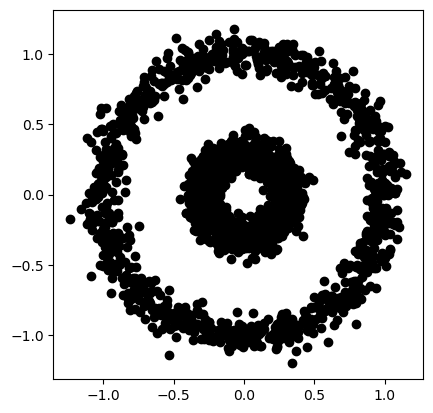

In [21]:
## Try again with nonlinear clusters

# This is an example of where K-means would not work because it looks at the distance globally
# we can see there are two clusters (inner and outer circle), but K-means will see a point on the outer circle to another point across and say they are two different clusters since they are far awayu from each other
# since dbscan looks at local distances it will correctly identify the inner and outer circles as clusters

N = 1000
th = np.linspace(0,2*np.pi,N)

# create the two circles
data1 = np.array((np.cos(th), np.sin(th))) + np.random.randn(2,N)/15
data2 = .3*np.array((np.cos(th), np.sin(th))) + np.random.randn(2,N)/15

# put them together into one dataset
circdata = np.hstack((data1,data2)).T
print(np.shape(circdata))

# plot
plt.plot(circdata[:,0],circdata[:,1],'ko')
plt.axis('square')
plt.show()

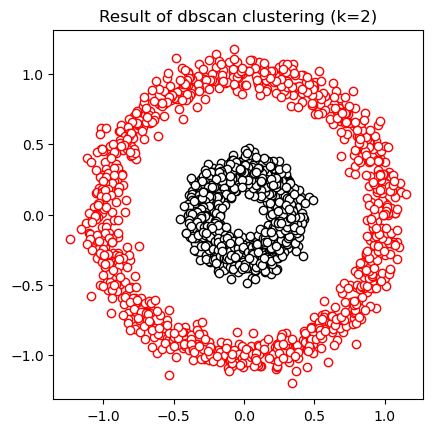

In [22]:
## dbscan

clustmodel = DBSCAN(eps=.2,min_samples=6).fit(circdata)
groupidx = clustmodel.labels_

nclust = max(groupidx)+1 # +1 for indexing

# now draw the raw data in different colors
for i in range(nclust):
    plt.plot(circdata[groupidx==i,0],circdata[groupidx==i,1],'o',color=lineColors[i],markerfacecolor='w')

# this will show dbscan correctly identifying the two clusters of the inner and outer circle
    
# and plot unassigned data
plt.plot(circdata[groupidx==-1,0],circdata[groupidx==-1,1],'k+')
plt.axis('square')
plt.title('Result of dbscan clustering (k=' + str(nclust) + ')')

plt.show()

c:\anaconda\envs\pytorch2023\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\anaconda\envs\pytorch2023\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


kmeans computed centroids:  [[-3.02617526  0.90669201]
 [ 3.04587524  3.05220309]
 [ 0.9815923   0.98336509]]
dbscan computed centroids:  [[ 0.9568127   0.98261709]
 [-3.05718226  0.86210085]
 [ 3.04872363  3.07847337]]


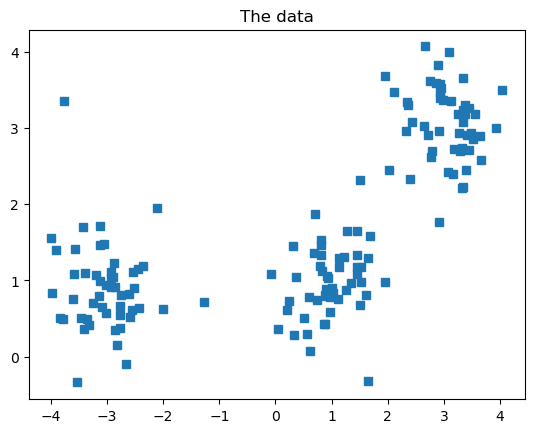

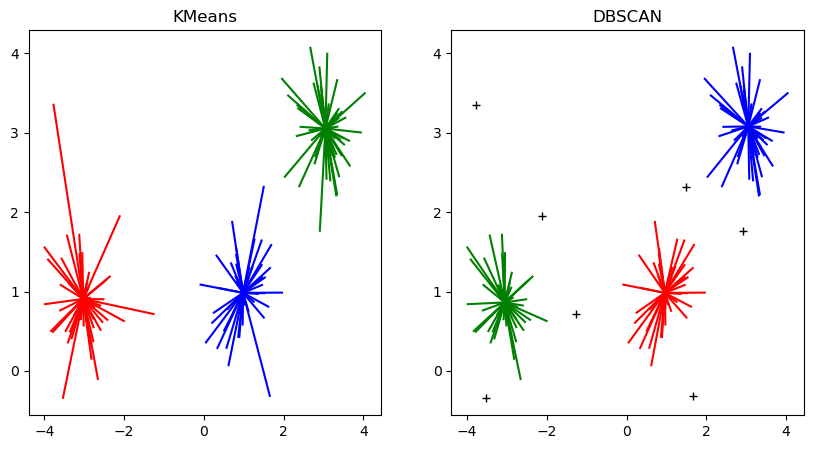

In [8]:
### Compare Kmeans and DBSCAN

from sklearn.cluster import KMeans

nPerClust = 50 # 50 data points per cluster

# blur around centroid (std units)
blur = .5

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

a = [A[0]+np.random.randn(nPerClust)*blur,A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur,B[1]+np.random.randn(nPerClust)*blur]
c = [C[0]+np.random.randn(nPerClust)*blur,C[1]+np.random.randn(nPerClust)*blur]

data = np.concatenate((a,b,c),axis=1) # put x and y coords in separate rows
data = np.transpose(data) # transpose the coords x to col one and y coords to the other col

# show the data
xs = data[:,0] # all rows and first col for x coords
ys = data[:,1] # all rows second col for y coords
plt.plot(xs,ys,'s')
plt.title('The data')

# kmeans
k=3
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(data)
groupidx = kmeans.predict(data) 
cents = kmeans.cluster_centers_ # 2d arr: x and y coords of the cluster centers
print('kmeans computed centroids: ',cents)

#dbscan
clustmodel = DBSCAN(eps=.6,min_samples=6).fit(data)
dbgroupidx = clustmodel.labels_ # nums corresponding to the cluster group data belongs corresponding to index of original data points
dbclusters = max(dbgroupidx)+1 # labels are zero based numbers, add one to get the number of clusters computed

# get computed centroids of dbscan results
dbcents = np.zeros((dbclusters, 2)) # init to store x and y coords(col) for each cluster(row)
for ci in range(dbclusters):
    # assign x of centroid at row ci/col 0 to the mean of all x coords in the group
    dbcents[ci,0] = np.mean(data[dbgroupidx==ci,0])
    dbcents[ci,1] = np.mean(data[dbgroupidx==ci,1])
print('dbscan computed centroids: ', dbcents)


fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('KMeans')
ax[1].set_title('DBSCAN')

linecolors = 'rgb'
# loop over the 150 data points [[X,Y]...]
for i in range(0,len(data)):
    # kmeans plots:
    group = groupidx[i] # will correspond to the group of the i-th data point
    ax[0].plot([data[i,0],cents[group,0]],[data[i,1],cents[group,1]],linecolors[group])

    #dbscan plots:
    noise = -1
    if dbgroupidx[i] == noise: # if the data point is considered noise...
        ax[1].plot(data[i,0],data[i,1],'k+')
    else:
        # a line from the data point to the computed dbscan centroid:
        ax[1].plot([data[i,0],dbcents[dbgroupidx[i],0]],[data[i,1],dbcents[dbgroupidx[i],1]],linecolors[dbgroupidx[i]])

####       
# a major difference between dbscan and k-means is that dbscan will simply exclude points that don't fit into a cluster (assign them as noise), whereas     
    # k-means will assign every single data point to a cluster.
####

In [13]:
# import numpy as np

# d = np.array([[1,2],[4,5],[7,8]])

# print(d[0,1]) # numpy operation syntax only - does not work on normal lists

2
